# Translational symmetry, boundary conditions, probability current

Saumya Biswas (sbiswas4@umd.edu)

For more information about QuTiP see [http://qutip.org](http://qutip.org)

We introduce the basic functionality of QuTiPs Lattice1d class of the lattice module.

## Bloch's theorem, Born von Karmen (Periodic) Boundary Condition
In a crystal with periodic boundary condition, the wave function of a particle assumes the Bloch form resolvable into the product of a plain wave($|k \rangle$) and a cell periodic part($| u_{n}(k) \rangle$).
\begin{eqnarray}
|\psi_n(k) \rangle = |k \rangle \otimes | u_{n}(k) \rangle 
\end{eqnarray}

The periodicity of the crystal limits the crystal momenta, k to a set of discrete values(as many as the number of cells(L) in the crystal).
We name this set $k_{lat}$ and enumerate the crystal momenta of the $k_{lat}$ with the wave-vector associated with them.


In a 1d crystal of L cells, for $k \in k_{lat}$, k is one of the values,
\begin{eqnarray}
k = \frac{2\pi}{La}\times n, \ \ \ \ \ \text{where} \ \ \ n = 0,1,2,...., L-1 \ \ \text{and a is the length of the unit cell}
\end{eqnarray}

We choose the convention where k values are centered around 0.

\begin{eqnarray}
k = \frac{2\pi}{La}\times (n - \frac{L}{2}+ mod(L+1,2) ), \ \ \ \ \ \text{where} \ \ \ n = 0,1,2,...., L-1 \ \ \text{and a is the length of the unit cell}
\end{eqnarray}

<font color='blue'> Important Convention note for qutip.lattice: The length of the unit cell (an integer multiple of the lattice constant a) is always set to 1.  </font>

## The Crystal Momentum Operator
Like any operator with discrete eigenvalues, the crystal momentum operator can be formed as a sum of its projections into all the individual eigen-kets.
\begin{eqnarray}
\hat{\bf{k}} = \sum\limits_{k \in k_{lat}} k| k \rangle \langle k |
\end{eqnarray}


We enumerate the position operator with the index, j. So a complete set of position eigenkets have corresponding position eigenvalues labeled as, 
\begin{eqnarray}
x = ja ,\ \ \ \ \ \ \ \text{where} j = 0, 1, 2, ..., L-1
\end{eqnarray}
Each position eigenket defined as such simply refer to a particle localized at a certain cell, j. We label these position eigenkets as $|j\rangle$

The momentum eigenfunctions in the position basis are the properly normalized plane waves(continuum state normalization).
\begin{eqnarray}
\langle j|k \rangle = \sqrt{\frac{a}{h}} e^{i \frac{2\pi x}{L}j } \\
\langle k'| k \rangle = \delta(k-k')
\end{eqnarray}
The $\langle j|k \rangle$ have the dimension of $[\text{momentum dimension}]^{-\frac{1}{2}}$

The matrix elements of the crystal momentum operator($\hat{\bf{k}}$) in the basis of ${|j \rangle}$ are formed as follows
\begin{eqnarray}
\langle j|k|j' \rangle = \sum\limits_{k \in k_{lat}} k\langle j | k \rangle \langle k |j' \rangle \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
=\frac{1}{h} \frac{2\pi}{L}\sum\limits_{n=0}^{L-1} (n-\frac{L}{2}+mod(L+1,2)) e^{-i \frac{2\pi n}{L}(j'-j) } \ \ \ \ \ \ \\
\end{eqnarray}


### Example usage of qutip.lattice.k() 

In [1]:
from qutip_lattice import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
periodic_atom_chain8 = Lattice1d(num_cell=8, boundary = "periodic")
k8 = periodic_atom_chain8.k()

In [3]:
[ks8, pw8] = k8.eigenstates()

In [4]:
ks8

array([-2.35619449, -1.57079633, -0.78539816,  0.        ,  0.78539816,
        1.57079633,  2.35619449,  3.14159265])

The values of ks8 are better understood if multiplied by $8/(2\pi)$

In [5]:
ks8 * (8/2/np.pi)

array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [6]:
pw8[3] # ks8[3] = 0 has an eigenvector that has a frequency of 0 and wavelength of
       # infinity, the eigen-vector is normalized to unity, meaning the sum of all
       # the elements sqared is 1

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]]

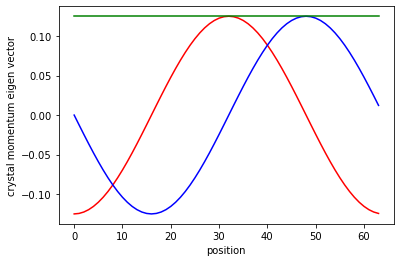

In [9]:
# The eigenvectors are better demonstrated with a latice of longer length
# Here we plot the second and third eigen-vectors(real and imaginary parts) of the first
# 3 eigenvectors of the crystal momentum operator for a 1d lattice with 64 cells
periodic_atom_chain64 = Lattice1d(num_cell=64, boundary = "periodic")
k64 = periodic_atom_chain64.k()
[ks64, pw64] = k64.eigenstates()
plt.plot(np.real(pw64[32].full()),'r')
plt.plot(np.imag(pw64[32].full()),'b')
plt.plot(np.abs(pw64[32].full()),'g')
plt.xlabel('position')
plt.ylabel('crystal momentum eigen vector')
plt.show()
plt.close()

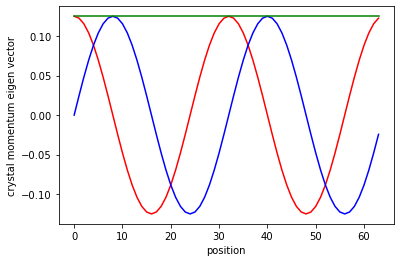

In [10]:
k64 = periodic_atom_chain64.k()
[ks64, pw64] = k64.eigenstates()
plt.plot(np.real(pw64[33].full()),'r')
plt.plot(np.imag(pw64[33].full()),'b')
plt.plot(np.abs(pw64[33].full()),'g')
plt.xlabel('position')
plt.ylabel('crystal momentum eigen vector')
plt.show()
plt.close()

## Simultaneous eigenstates of the Hamiltonian and the crystal momentum operator: Plane waves

In [11]:
Hamt8 = periodic_atom_chain8.Hamiltonian()

In [12]:
pw8_M = np.array([pw8[0].full(),pw8[1].full(),pw8[2].full(),pw8[3].full(),
       pw8[4].full(),pw8[5].full(),pw8[6].full(),pw8[7].full()])
pw8_M = np.squeeze(pw8_M, axis=2)  # changing shape from (8,8,1) to (8,8)
     # pw8_M is a matrix of 8 columns, each of which are the eigenvectors
     # of the crystal momentum operator
pw8_M = Qobj(pw8_M)

pw8_M is a matrix whose columns are the eigen-vectors of the crystal momentum operator.

In [13]:
pw8_M * Hamt8 * pw8_M.dag()

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.41421356  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         -1.41421356  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         -2.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.         -1.41421356  0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.41421356  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          2.        ]]

Therefore, pw8_M.dag() is the linear transformation that diagonalizes the Hamt8 matrix.

This is exactly what is done inside the get_dispersion() and plot_dispersion() methods. The tranformation from site basis to the plane wave basis (eigenstates of the crystal momentum operator) diagonalizes the Hamiltonian.

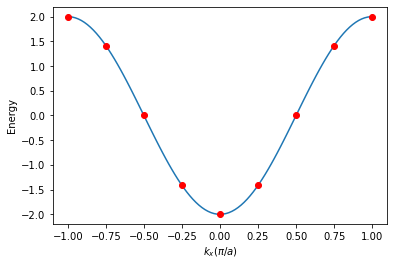

[[-3.14159265]
 [-2.35619449]
 [-1.57079633]
 [-0.78539816]
 [ 0.        ]
 [ 0.78539816]
 [ 1.57079633]
 [ 2.35619449]]
[[ 2.          1.41421356  0.         -1.41421356 -2.         -1.41421356
   0.          1.41421356]]


In [14]:
periodic_atom_chain8.plot_dispersion()
[knxA,val_kns] = periodic_atom_chain8.get_dispersion()
print(knxA)
print(val_kns)

So, eigenvectors of the crystal momentum are eigenvectors of the Hamiltonian as 
well. This is a consequence of the translational symmetry of the lattice. The generator of the lattice translational operator is the crystal momentum operator. Due to the translational symmetry, the lattice translational operator, the crystal momentum and the Hamiltonian all commute with each other. So they can have simultaneous eigenstates.

In [15]:
# A check that the Hamiltonian and the crystal momentum operator do indeed commute
Hamt8 * k8 - k8 * Hamt8

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

In [16]:
pw8_M

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.35355339+0.j         -0.25      -0.25j        0.        +0.35355339j
   0.25      -0.25j       -0.35355339+0.j          0.25      +0.25j
   0.        -0.35355339j -0.25      +0.25j      ]
 [ 0.35355339+0.j          0.        -0.35355339j -0.35355339+0.j
   0.        +0.35355339j  0.35355339+0.j          0.        -0.35355339j
  -0.35355339+0.j          0.        +0.35355339j]
 [ 0.35355339+0.j          0.25      -0.25j        0.        -0.35355339j
  -0.25      -0.25j       -0.35355339+0.j         -0.25      +0.25j
   0.        +0.35355339j  0.25      +0.25j      ]
 [ 0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.35355339+0.j        ]
 [ 0.35355339+0.j          0.25      +0.25j        0.        +0.35355339j
  -0.25      +0.25j       -0.35355339+0.j         -0.25      -0.25j
   0.  

In [24]:
aperiodic_atom_chain8 = Lattice1d(num_cell=8, boundary = "aperiodic")
aHamt8 = aperiodic_atom_chain8.Hamiltonian()
ix = 5
cos8_M = (pw8[ix] + pw8[ix].conj())/2
sin8_M = (pw8[ix] - pw8[ix].conj())/2j
ecol = aHamt8 * sin8_M
print(sin8_M.dag())
print(ecol.dag())
#print(ecol * (sin8_M[1]/ecol[1]))

Quantum object: dims = [[1], [8]], shape = (1, 8), type = bra
Qobj data =
[[ 0.          0.35355339  0.         -0.35355339  0.          0.35355339
   0.         -0.35355339]]
Quantum object: dims = [[1], [8]], shape = (1, 8), type = bra
Qobj data =
[[-0.35355339  0.          0.          0.          0.          0.
   0.          0.        ]]


[[0. 0. 0. 0. 0. 0. 0. 0.]]


/home/ssaumya7/anaconda_21/envs/serenity/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


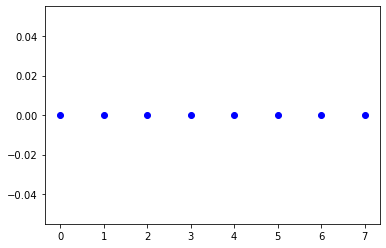

In [23]:
type(pw8_M)
#cos8_M = (pw8_M + pw8_M.conj())/2
#sin8_M = (pw8_M - pw8_M.conj())/2j

nI = np.arange(0,8,1)
Row1 = sin8_M[7, :]
print(np.imag(Row1))


plt.plot(nI,Row1.T,'bo')
plt.show()
plt.close()

In [25]:
Col = Qobj(cos8_M[0,:])
eCol = aHamt8 * Col.dag()
print(eCol)
print(Col)
Quot = np.divide(eCol.full(), Col.dag().full())


Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.         -0.35355339  0.          0.          0.          0.
   0.          0.        ]
 [-0.35355339  0.         -0.35355339  0.          0.          0.
   0.          0.        ]
 [ 0.         -0.35355339  0.         -0.35355339  0.          0.
   0.          0.        ]
 [ 0.          0.         -0.35355339  0.         -0.35355339  0.
   0.          0.        ]
 [ 0.          0.          0.         -0.35355339  0.         -0.35355339
   0.          0.        ]
 [ 0.          0.          0.          0.         -0.35355339  0.
  -0.35355339  0.        ]
 [ 0.          0.          0.          0.          0.         -0.35355339
   0.         -0.35355339]
 [ 0.          0.          0.          0.          0.          0.
  -0.35355339  0.        ]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.35355339]]


In [18]:
sin8_M * Hamt8 * sin8_M.dag()

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.          0.          0.          0.          0.
   0.70710678  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         -0.70710678  0.          0.70710678  0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.70710678  0.         -0.70710678  0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.70710678  0.          0.          0.          0.          0.
   0.70710678  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]

In [19]:
pw8_M * Hamt8 * pw8_M.dag()

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.41421356  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         -1.41421356  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         -2.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.         -1.41421356  0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.41421356  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          2.        ]]

## Simultaneous eigenstates of the Hamiltonian and the Translational operator: Bloch Wavefunctions

Because of the periodic potential of the lattice, the eigestate of the Hamiltonian are to be in the Bloch wavefunction form.
\begin{eqnarray}
|\psi_n(k) \rangle = |k \rangle \otimes | u_{n}(k) \rangle   \nonumber \\
\end{eqnarray}
The vectors $| u_{nk}(r) \rangle \in H_{internal}$ are the eigenstates of the bulk momentum space Hamiltonian $H(k)$ defined as
\begin{eqnarray}
\langle k | H_{bulk} | k \rangle = \sum\limits_{\alpha,\beta,\gamma,... \in {H_{internal}}} \langle k, \alpha | H_{bulk} | k, \beta \rangle | \alpha \rangle \langle \beta |  \nonumber \\
H(k)|u_{n}(k) \rangle = E_n(k)| u_{n}(k) \rangle
\end{eqnarray}

In the case of a perioodic atom chain, $H_{bulk}$ is a matrix of dimension $1\times1$ as the set $\{\alpha, \beta, \gamma, ...\}$ has only one member and is $\{\alpha\}$. The array of $| u_{n}(k) \rangle  $ at the array of the corresponding crystal momentums, k are available through lattice1d.cell_periodic_parts().

In [20]:
(knxA, vec_kns) = periodic_atom_chain8.cell_periodic_parts()
vec_kns
print(knxA)
print(vec_kns)

[[-3.14159265]
 [-2.35619449]
 [-1.57079633]
 [-0.78539816]
 [ 0.        ]
 [ 0.78539816]
 [ 1.57079633]
 [ 2.35619449]]
[[[1.+0.j]]

 [[1.+0.j]]

 [[1.+0.j]]

 [[1.+0.j]]

 [[1.+0.j]]

 [[1.+0.j]]

 [[1.+0.j]]

 [[1.+0.j]]]


Since the $| u_{n}(k) \rangle  $ are all 1, the eigenstates of the Hamiltonian, the Bloch wavefunctions are simply the plain waves ($|k \rangle$) .
\begin{eqnarray}
|\psi_n(k) \rangle = |k \rangle \otimes | u_{n}(k) \rangle = |k \rangle  \nonumber \\
\end{eqnarray}

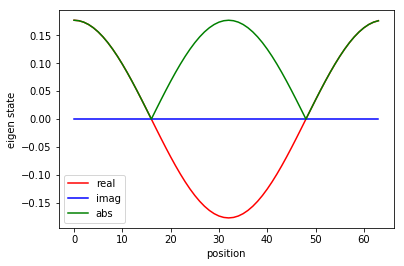

In [21]:
eigen_states64 = periodic_atom_chain64.bloch_wave_functions()
idx = 33
plt.plot(np.real(eigen_states64[idx][1]),'r')
plt.plot(np.imag(eigen_states64[idx][1]),'b')
plt.plot(np.abs(eigen_states64[idx][1]),'g')
plt.legend(['real','imag','abs'])
plt.xlabel('position')
plt.ylabel('eigen state')
plt.show()
plt.close()

## Cell periodic parts in a Coupled Resonator Optical Waveguide (CROW) lattice

In a more complex lattice, as in a CROW lattice(ref [2]) the $| u_{n}(k) \rangle$ are not necessary 1. The plane waves are modulated by nontrivial $| u_{n}(k) \rangle$ for this case.

In [22]:
J = 2
eta = 0
cell_H = Qobj(np.array([[0, J * np.sin(eta)], [J * np.sin(eta), 0]]))
inter_cell_T = (J/2) * Qobj(np.array([[np.exp(eta * 1j), 1], [1, np.exp(-eta*1j)]]))
CROW_lattice = Lattice1d(num_cell=8, boundary = "periodic", cell_num_site = 2,
                         cell_site_dof = [1], Hamiltonian_of_cell = cell_H,
                         inter_hop = inter_cell_T )
(knxA, vec_kns) = CROW_lattice.cell_periodic_parts()
CROW_Ham = CROW_lattice.Hamiltonian()

In [23]:
knxA

array([[-3.14159265],
       [-2.35619449],
       [-1.57079633],
       [-0.78539816],
       [ 0.        ],
       [ 0.78539816],
       [ 1.57079633],
       [ 2.35619449]])

In [24]:
vec_kns[0]

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j]])

eigenvalue:  -4.0


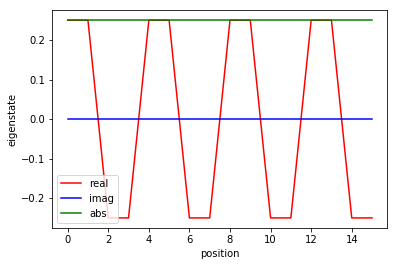

In [25]:
eigen_states_CROW = CROW_lattice.bloch_wave_functions()
idx = 0
print('eigenvalue: ',eigen_states_CROW[idx][0])
plt.plot(np.real(eigen_states_CROW[idx][1]),'r')
plt.plot(np.imag(eigen_states_CROW[idx][1]),'b')
plt.plot(np.abs(eigen_states_CROW[idx][1]),'g')
plt.legend(['real','imag','abs'])
plt.xlabel('position')
plt.ylabel('eigenstate')
plt.show()
plt.close()

# Complete Set of Commuting Observables

## Relationship of Expansion in momentum eigenkets to fft

We form a Gaussian state in the position basis and evaluate its Discrete Fourier Transform(DFT) for evaluating its frequency components.

In [26]:
xs8 = np.arange(0,8)
Gaussian8_sum_to_1 = 1/np.sqrt(2*np.pi* 0.5 **2) * np.exp(-(xs8 - 3)**2/2/0.5**2)
Gaussian_state8 = np.sqrt(Gaussian8_sum_to_1) # A normalized Gaussian state

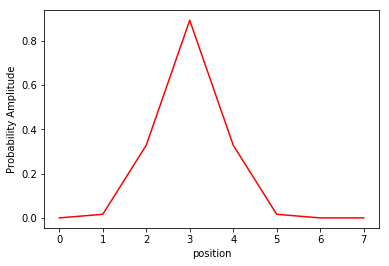

In [27]:
plt.plot(Gaussian_state8,'r')
plt.xlabel('position')
plt.ylabel('Probability Amplitude')
plt.show()
plt.close()

### Inner Product of crystal momentum eigenket and a state

In [28]:
k_exps = pw8_M.dag() * Gaussian_state8  # ket vector of inner products with crystal
                                       # momentum eigenkets
k_exps = k_exps/ np.sqrt( np.sum(np.multiply(k_exps, np.conj(k_exps)))) # normalization

### fft spectrum

In [29]:
dft_Gaussian_state = np.fft.fft(Gaussian_state8)
sq_dft_Gaussian_state = np.multiply(dft_Gaussian_state, np.conj(dft_Gaussian_state))
sqrt_area_sq_dft_Gaussian_state = np.sqrt(np.sum(sq_dft_Gaussian_state))
norml_dft_Gaussian_state = dft_Gaussian_state / sqrt_area_sq_dft_Gaussian_state

#### Comparison

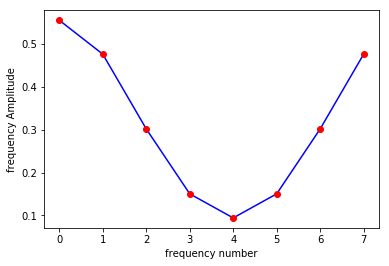

In [30]:
plt.plot(np.abs(norml_dft_Gaussian_state),'b')
plt.plot(np.abs(k_exps),'ro')
plt.xlabel('frequency number')
plt.ylabel('frequency Amplitude')
plt.show()
plt.close()

Therefore, expanding a state in momentum eigenkets is equivalent of a DFT for a periodic lattice.

In [31]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Original developers: R. J. Johansson & P. D. Nation.
Current admin team: Alexander Pitchford, Paul D. Nation, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, and Eric Giguère.
Project Manager: Franco Nori.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.5.0.dev0+c8074e5
Numpy Version:      1.15.2
Scipy Version:      1.1.0
Cython Version:     0.28.5
Matplotlib Version: 3.0.0
Python Version:     3.5.4
Number of CPUs:     2
BLAS Info:          INTEL MKL
OPENMP Installed:   True
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/ssaumya7/Desktop/GSOC/Aug5/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`


In [32]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
